In [1]:
conda install -c conda-forge scikit-learn

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm
import statsmodels.formula.api as smf

/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Importing necessary libraries for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv('nasa.csv')

### 1. Understanding Dataset

In [4]:
print(df.head())

        id                 name  est_diameter_min  est_diameter_max  \
0  2162635  162635 (2000 SS164)          1.198271          2.679415   
1  2277475    277475 (2005 WK4)          0.265800          0.594347   
2  2512244   512244 (2015 YE18)          0.722030          1.614507   
3  3596030          (2012 BV13)          0.096506          0.215794   
4  3667127          (2014 GE35)          0.255009          0.570217   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0        13569.24922    54839744.08         Earth          False   
1        73588.72666    61438126.52         Earth          False   
2       114258.69210    49798724.94         Earth          False   
3        24764.30314    25434972.72         Earth          False   
4        42737.73376    46275567.00         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20   

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
# Summary statistics of numerical columns
print(df.describe())

                 id  est_diameter_min  est_diameter_max  relative_velocity  \
count  9.083600e+04      90836.000000      90836.000000       90836.000000   
mean   1.438288e+07          0.127432          0.284947       48066.918918   
std    2.087202e+07          0.298511          0.667491       25293.296961   
min    2.000433e+06          0.000609          0.001362         203.346432   
25%    3.448110e+06          0.019256          0.043057       28619.020648   
50%    3.748362e+06          0.048368          0.108153       44190.117890   
75%    3.884023e+06          0.143402          0.320656       62923.604635   
max    5.427591e+07         37.892650         84.730541      236990.128100   

       miss_distance  absolute_magnitude  
count   9.083600e+04        90836.000000  
mean    3.706655e+07           23.527103  
std     2.235204e+07            2.894086  
min     6.745533e+03            9.230000  
25%     1.721082e+07           21.340000  
50%     3.784658e+07           23.70000

In [7]:
# Check for missing values
print(df.isnull().sum())

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64


## Data Cleaning

In [8]:
df.duplicated().sum() # no duplicate

0

In [9]:
df.sentry_object.value_counts() # we can remove this column as it is include only 1 record

sentry_object
False    90836
Name: count, dtype: int64

In [10]:
df.orbiting_body.value_counts() # we can remove this column as it is include only 1 record also

orbiting_body
Earth    90836
Name: count, dtype: int64

### 3. Exploratory Data Analysis

/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


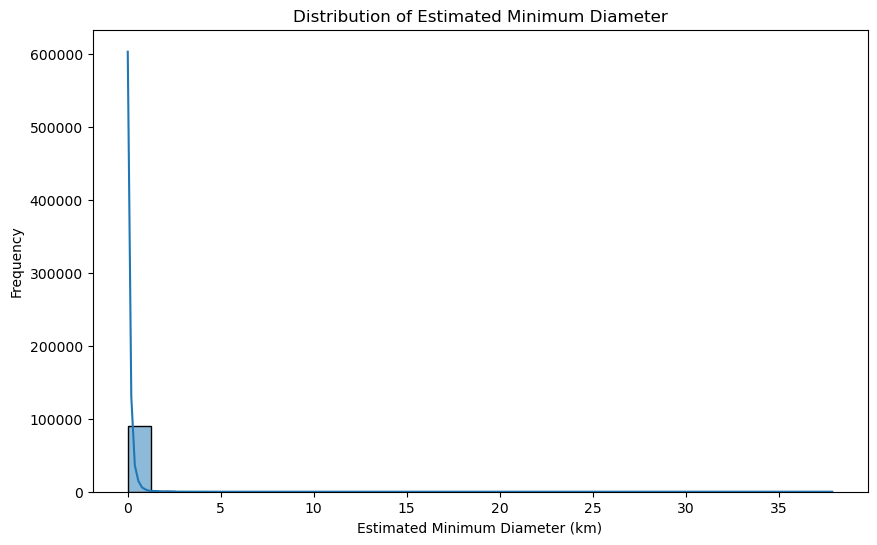

In [11]:
# Visualize the distribution of the 'est_diameter_min' column
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='est_diameter_min', bins=30, kde=True)
plt.title('Distribution of Estimated Minimum Diameter')
plt.xlabel('Estimated Minimum Diameter (km)')
plt.ylabel('Frequency')
plt.show()

### Verifying the correlation between our variables

##### Verifying the correlation between our variables, here we can see that we have a strong correlation between the variables est_diameter_min and est_diameter_max

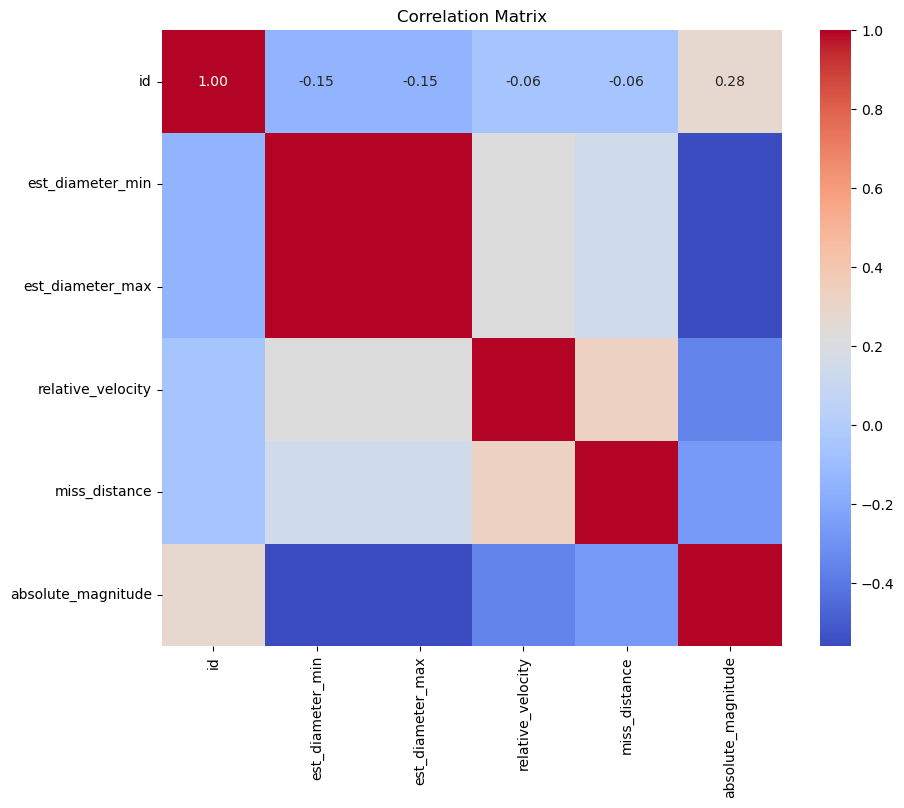

In [12]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Relation between object parameters and hazardous

/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Diamtere VS hazardous')

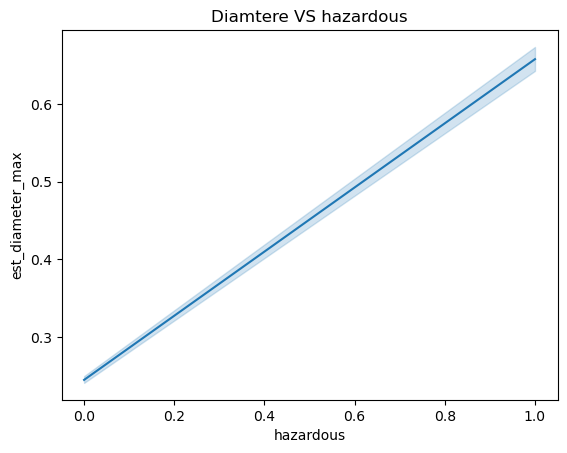

In [13]:
sns.lineplot(x=df.hazardous,y=df.est_diameter_max)
plt.title('Diamtere VS hazardous')

/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Diamtere VS relative_velocity')

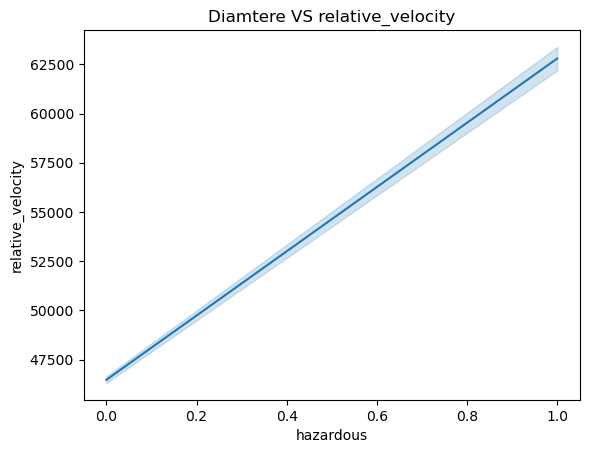

In [14]:
sns.lineplot(x=df.hazardous,y=df.relative_velocity)
plt.title('Diamtere VS relative_velocity')

##### Absolute_maginitude - Describes intrinsic luminosity

/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Diamtere VS absolute_magnitude')

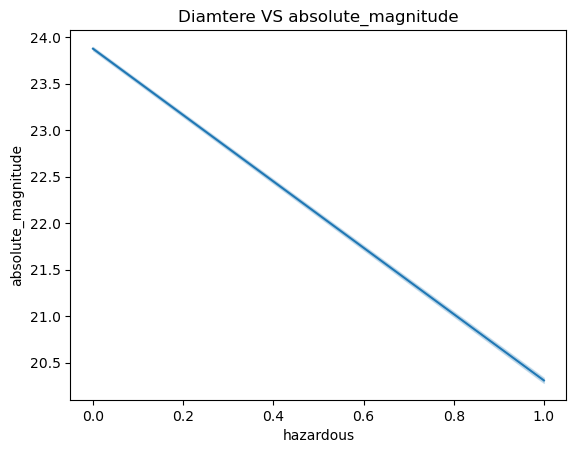

In [123]:
sns.lineplot(x=df.hazardous,y=df.absolute_magnitude)
plt.title('Diamtere VS absolute_magnitude')

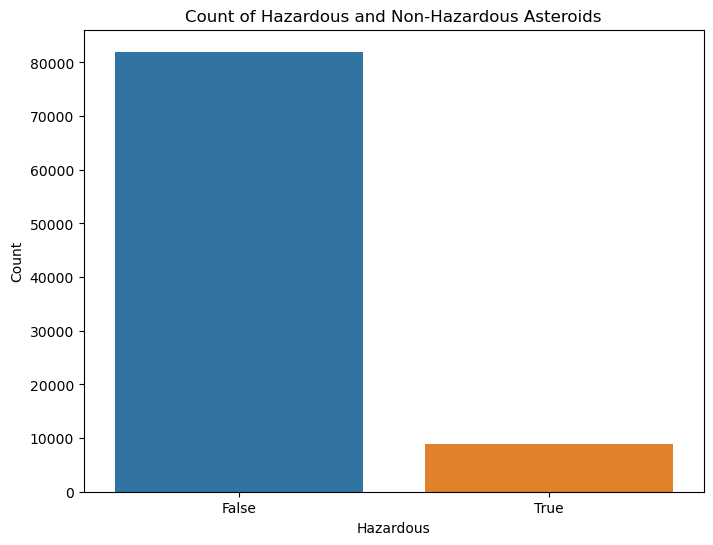

In [135]:
# Countplot for 'hazardous' column
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hazardous')
plt.title('Count of Hazardous and Non-Hazardous Asteroids')
plt.xlabel('Hazardous')
plt.ylabel('Count')
plt.show()

In [136]:
# Get the actual counts
counts = df['hazardous'].value_counts()
print("Counts for each category in 'hazardous':")
print(counts)

plt.show()

Counts for each category in 'hazardous':
hazardous
False    81996
True      8840
Name: count, dtype: int64


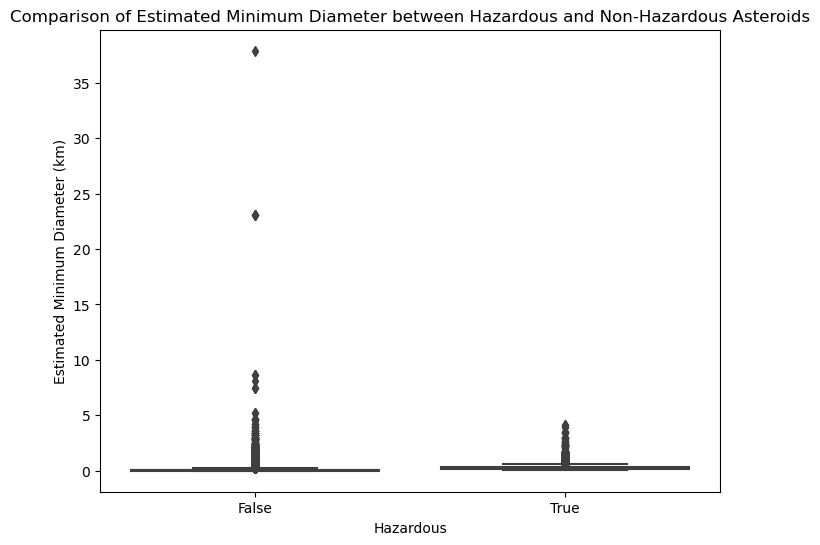

In [97]:
# Boxplot to compare 'est_diameter_min' between hazardous and non-hazardous asteroids
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='hazardous', y='est_diameter_min')
plt.title('Comparison of Estimated Minimum Diameter between Hazardous and Non-Hazardous Asteroids')
plt.xlabel('Hazardous')
plt.ylabel('Estimated Minimum Diameter (km)')
plt.show()

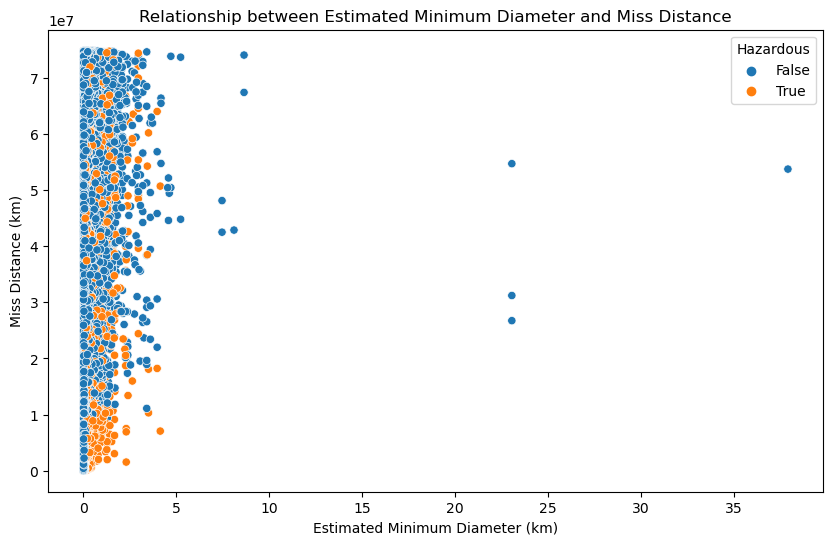

In [98]:
# Scatter plot to visualize the relationship between 'est_diameter_min' and 'miss_distance'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='est_diameter_min', y='miss_distance', hue='hazardous')
plt.title('Relationship between Estimated Minimum Diameter and Miss Distance')
plt.xlabel('Estimated Minimum Diameter (km)')
plt.ylabel('Miss Distance (km)')
plt.legend(title='Hazardous')
plt.show()

### Bivariate Analysis
##### When we compare our variable target with others Continuous variables, we can see some insights: Most dangerous asteroids do not have a large diameter, the Relative Velocity starts at almost 20000 and the most important feeling we can see here is the Absolute Magnitude, most of the dangerous asteroids have the value of the variable Absolute Magnitude between 18-23.When we compare the variable Absolute Magnitude which others Continuous Variables we can see that most part of the Dangerous Asteroids have the variable Absolute Magnitude between 18-23, Miss Distance Between 0-2 and the Relative Velocity between 50000 and 200000.

/var/folders/9q/vqgvcv992rb1j75lkp2l_80h0000gn/T/ipykernel_64723/4289459134.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "est_diameter_min", palette = "Set2", data = df)
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in

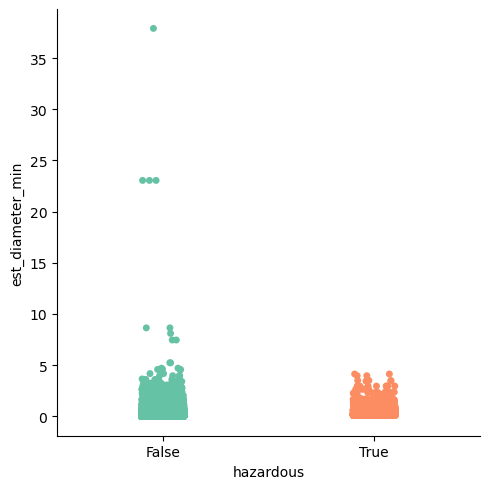

In [124]:
sns.catplot(x = "hazardous", y = "est_diameter_min", palette = "Set2", data = df)

/var/folders/9q/vqgvcv992rb1j75lkp2l_80h0000gn/T/ipykernel_64723/2129380272.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "est_diameter_max", palette = "Set2", data = df)
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in

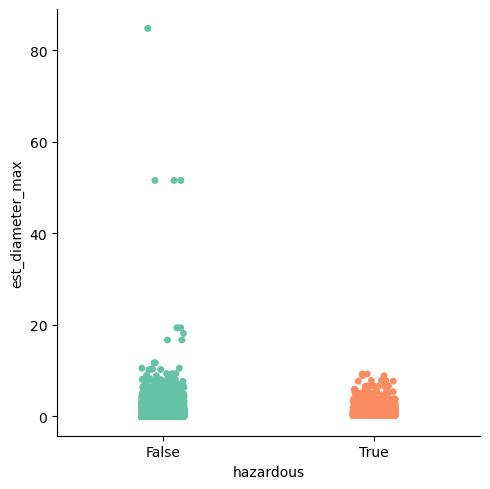

In [125]:
sns.catplot(x = "hazardous", y = "est_diameter_max", palette = "Set2", data = df)

/var/folders/9q/vqgvcv992rb1j75lkp2l_80h0000gn/T/ipykernel_64723/2041479392.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "relative_velocity", palette = "Set2", data = df)
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group i

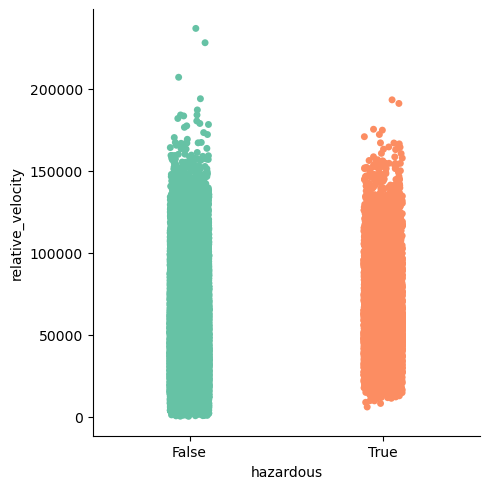

In [126]:
sns.catplot(x = "hazardous", y = "relative_velocity", palette = "Set2", data = df)

/var/folders/9q/vqgvcv992rb1j75lkp2l_80h0000gn/T/ipykernel_64723/871839151.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x = "hazardous", y = "miss_distance", palette = "Set2", data = df)
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anxiousviking/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a f

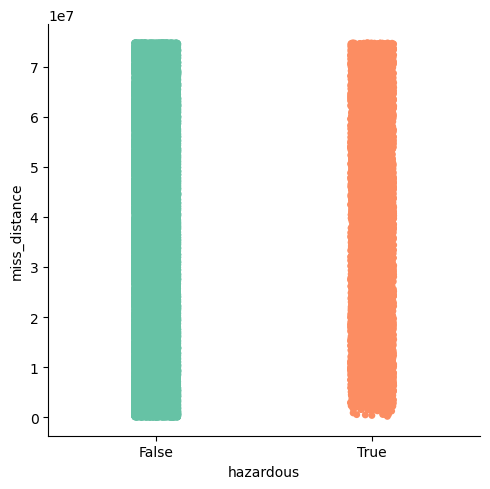

In [127]:
sns.catplot(x = "hazardous", y = "miss_distance", palette = "Set2", data = df)

### OLS to test the significance of each variable

In [130]:
# Define your X and y
X = df[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]
y = df['hazardous']

In [133]:
# Add a constant to the predictors
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()
# Print the summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              hazardous   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     3832.
Date:                Mon, 22 Apr 2024   Prob (F-statistic):               0.00
Time:                        09:08:12   Log-Likelihood:                -11344.
No. Observations:               90836   AIC:                         2.270e+04
Df Residuals:                   90831   BIC:                         2.275e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.9888      0

## Logistic Regression

In [99]:
# Define categorical and numerical features
categorical_features = ['name', 'orbiting_body']
numerical_features = ['est_diameter_min', 'est_diameter_max', 
                      'relative_velocity','miss_distance', 'absolute_magnitude']


In [100]:
# Splitting the data into features (X) and target variable (y)
X = df.drop(columns=['id', 'hazardous'])
y = df['hazardous']

In [101]:
# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [102]:
# Create pipeline for preprocessing
preprocessor = ColumnTransformer(transformers=[('num', StandardScaler(), numerical_features),('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [103]:
# Add classifier to pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', LogisticRegression())])


In [104]:
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['est_diameter_min',
                                                   'est_diameter_max',
                                                   'relative_velocity',
                                                   'miss_distance',
                                                   'absolute_magnitude']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['name', 'orbiting_body'])])),
                ('classifier', LogisticRegression())])

In [105]:
# Making predictions on the test set
y_pred = pipeline.predict(X_test)

In [106]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9603317309456534


In [107]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98     24597
        True       0.98      0.60      0.75      2654

    accuracy                           0.96     27251
   macro avg       0.97      0.80      0.86     27251
weighted avg       0.96      0.96      0.96     27251



In [108]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[24565    32]
 [ 1049  1605]]


In [109]:
# Obtain predicted probabilities from the pipeline
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

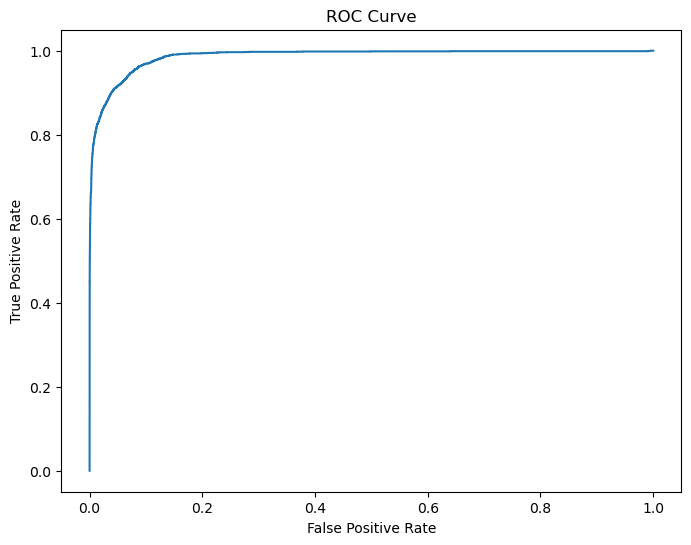

In [110]:
# Plotting ROC curve
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#### Model Variety ####

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

#### Selecting different models

In [62]:
# Define a list of models to compare
models = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

In [77]:
# Evaluate each model using cross-validation
results = {}
for name, model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),('classifier', model)])
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    results[name] = scores

    # Generate detailed output comparison
    y_pred = cross_val_predict(pipeline, X, y, cv=5)
    print(f"Classification Report for {name}:")
    print(classification_report(y, y_pred))


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98     81996
        True       0.99      0.65      0.78      8840

    accuracy                           0.97     90836
   macro avg       0.97      0.83      0.88     90836
weighted avg       0.97      0.97      0.96     90836

Classification Report for Random Forest:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99     81996
        True       0.97      0.78      0.86      8840

    accuracy                           0.98     90836
   macro avg       0.98      0.89      0.93     90836
weighted avg       0.98      0.98      0.98     90836

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

       False       0.96      1.00      0.98     81996
        True       0.98      0.57      0.72      8840

    accuracy                           0.96 

In [78]:
# Print the accuracy scores for comparison
for name, scores in results.items():
    print(f"{name}: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Logistic Regression: 0.97 (+/- 0.00)
Random Forest: 0.98 (+/- 0.00)
Support Vector Machine: 0.96 (+/- 0.00)
K-Nearest Neighbors: 0.95 (+/- 0.00)


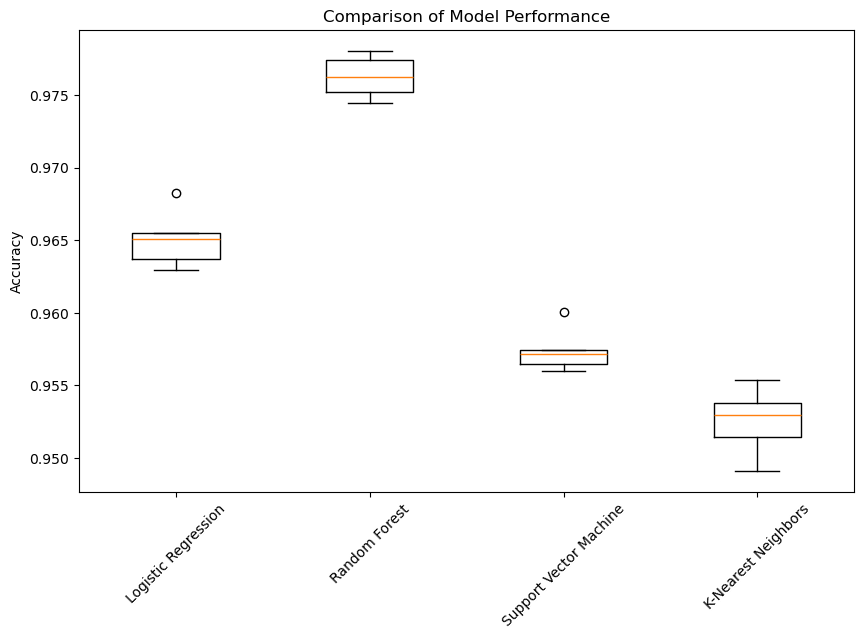

In [79]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.boxplot(results.values(), labels=results.keys())
plt.title('Comparison of Model Performance')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.show()

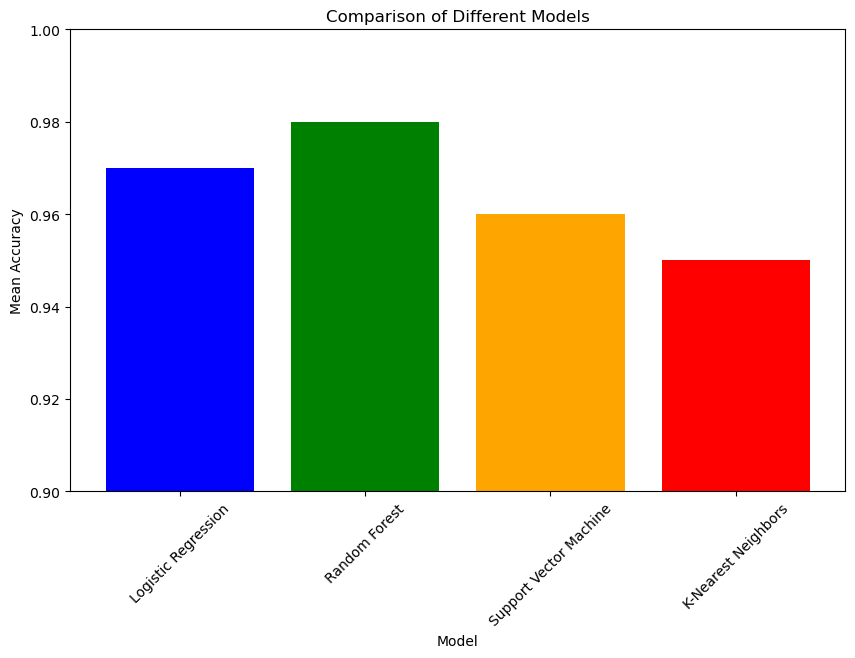

In [83]:
# Mean accuracy of each model
models = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors']
accuracies = [0.97, 0.98, 0.96, 0.95]  # Mean accuracy for each model

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Model')
plt.ylabel('Mean Accuracy')
plt.title('Comparison of Different Models')
plt.ylim(0.9, 1.0)  # Setting y-axis limits for better visualization
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
